# Part 2: Data Visualization

This phase focuses on enhancing the dataset by creating meaningful features that capture **temporal patterns, store-specific behaviors, and promotional effects**. It also includes **visual exploration to uncover trends, seasonality, and anomalies—laying** the groundwork for robust forecasting models.


## 1. Setup & Imports Libraries
-------------------------------

In [1]:
import time 

In [2]:
# Step 1: Setup & Imports Libraries
print("Step 1: Setup and Import Libraries started...")
time.sleep(1)  # Simulate processing time

Step 1: Setup and Import Libraries started...


In [3]:
# Data Manipulation & Processing
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
from datetime import datetime
from sklearn.preprocessing import *

# Data Visualization
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from pandas.plotting import scatter_matrix

sbn.set(rc={'figure.figsize':(14,6)})
plt.style.use('seaborn-v0_8')
sbn.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

# Warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

In [4]:
print("="*60)
print("Rossman Store Sales Time Series Analysis - Part 2")
print("="*60)
print("All libraries imported successfully!")
print("Analysis Date:", pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'))


Rossman Store Sales Time Series Analysis - Part 2
All libraries imported successfully!
Analysis Date: 2025-08-05 09:36:46


In [5]:
print("✅ Setup and Import Liraries completed.\n")

✅ Setup and Import Liraries completed.



In [6]:
# Start analysis

part_2_begin = pd.Timestamp.now()

bold_start = '\033[1m'
bold_end = '\033[0m'

print("🔍 Part 2 Started ...")
print(f"🟢 Begin Date: {bold_start}{part_2_begin.strftime('%Y-%m-%d %H:%M:%S')}{bold_end}\n")

🔍 Part 2 Started ...
🟢 Begin Date: 2025-08-05 09:36:46




## Restore the file
----------------------------

In [7]:
%store -r df_features

### View or Display Dataset

In [8]:
print("\nTrain Data Preview:")
print("\n",df_features.head())


Train Data Preview:

         store  dayofweek       date  sales  customers  open     promo stateholiday  schoolholiday  isholiday  isschoolDay  day  week month  quarter  year  isweekend
982643   1115          2 2013-01-01      0          0     0  No Promo       Public              1       True        False  Tue     1   Jan        1  2013      False
982640   1112          2 2013-01-01      0          0     0  No Promo       Public              1       True        False  Tue     1   Jan        1  2013      False
982639   1111          2 2013-01-01      0          0     0  No Promo       Public              1       True        False  Tue     1   Jan        1  2013      False
982638   1110          2 2013-01-01      0          0     0  No Promo       Public              1       True        False  Tue     1   Jan        1  2013      False
982637   1109          2 2013-01-01      0          0     0  No Promo       Public              1       True        False  Tue     1   Jan        1  201

In [9]:
# Step 2: Data Ingestion
print("Step 2: Features Engineering started...")
time.sleep(1)  # Simulate processing time

Step 2: Features Engineering started...


In [10]:
# Make a copy of the original dataframe to avoid modifying it
df_features = train_df.copy()

NameError: name 'train_df' is not defined

#### 3.1 Promo mapping

In [ ]:
df_features['promo'] = df_features['promo'].astype(str).map({'1': 'Promo', '0': 'No Promo'})

#### Check 

In [ ]:
value_counts = df_features['promo'].value_counts()
value_counts

#### 3.1 Define the holiday type mapping

In [ ]:
# Define the holiday type mapping
holiday_map = {"0": "None","a": "Public","b": "Easter", "c": "Christmas"}

#### Spot Unexpected Values

In [ ]:
# Before mapping
unexpected_values = df_features[~df_features['stateholiday'].isin(holiday_map.keys())]['stateholiday'].unique()
print(f"Unexpected values before mapping: {unexpected_values}")


#### StateHoliday Mapping

In [ ]:
# StateHoliday mapping
df_features['stateholiday']= df_features['stateholiday'].map(holiday_map)

# Create IsHoliday feature
df_features['isholiday']= df_features['stateholiday'] !="None"

# IsSchool Feature - Rule: assume school is out for Public, Easter, and Christmas Breaks
df_features["isschoolDay"] = ~df_features["stateholiday"].isin(["Public", "Easter", "Christmas"])

# Mapping Check
unmapped_rows = df_features[df_features['stateholiday'].isna()]
print(f"Unmapped rows after mapping:\n{unmapped_rows[['stateholiday']]}")

# Print the count of each holiday type, including any missing (NaN) values for unmapped entries
print(f"\nHoliday type distribution:\n{df_features['stateholiday'].value_counts()}")

#### 3.2 Temporal F eatures

#### Store Features Dataframe

In [ ]:
# To pull df_features from one notebook to another in JupyterLab
%store -r df_features

In [ ]:
df_features.head()

In [ ]:
print("✅ Data Engineering completed.\n")

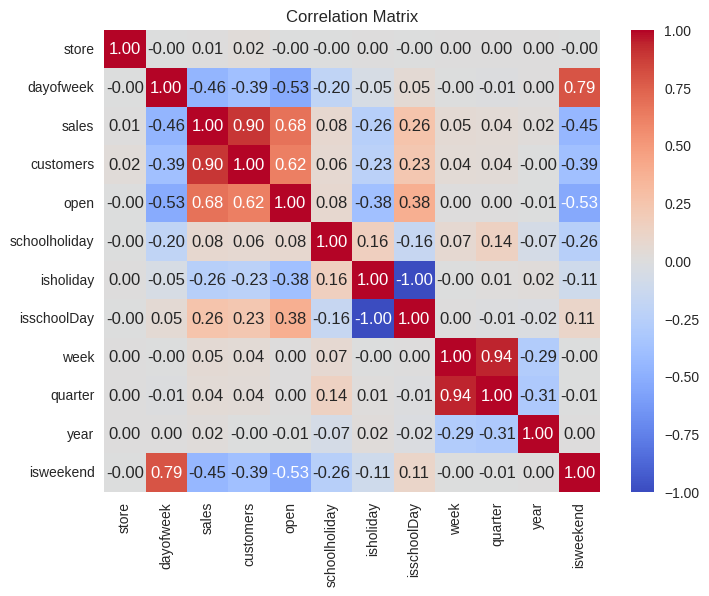

In [11]:
corr = df_features.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sbn.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

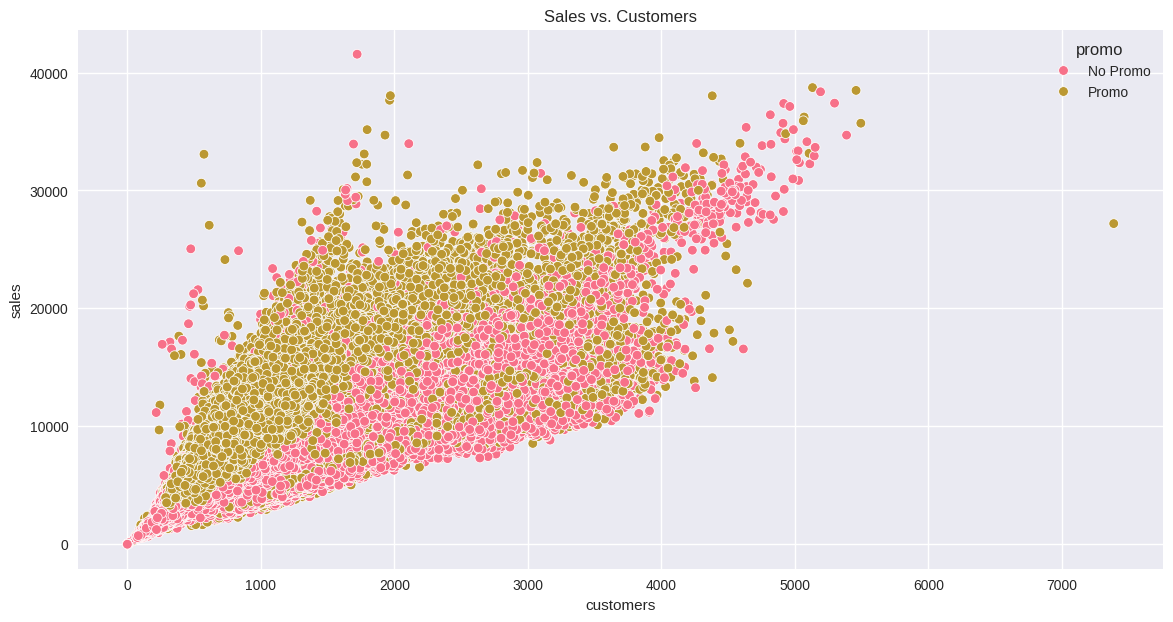

In [12]:
plt.figure(figsize=(14,7))
sbn.scatterplot(data=df_features, x ='customers', y ='sales', hue ='promo')
plt.title("Sales vs. Customers")
plt.show()

## Temporal Analysis

  stateholiday  isholiday  AvgSales
0    Christmas       True    168.73
1       Easter       True    214.31
2         None      False   5940.39
3       Public       True    290.74


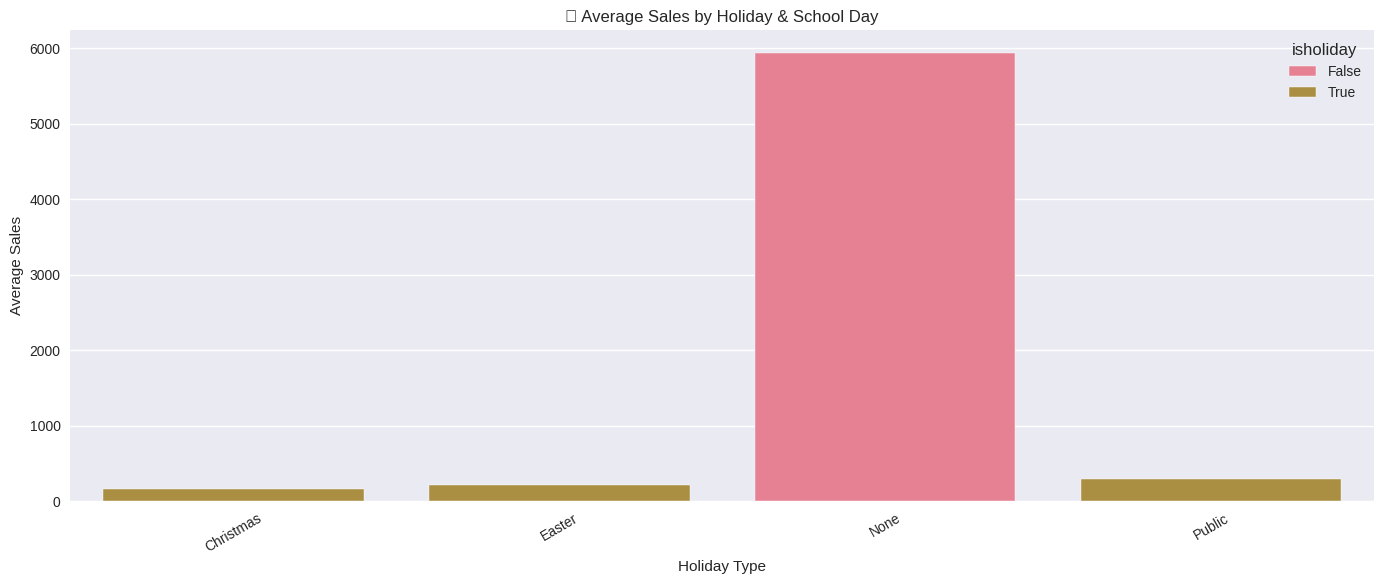

In [13]:
# Group and compare sales
impact_df = df_features.groupby(["stateholiday", "isholiday"])["sales"].mean().reset_index()
impact_df.rename(columns ={ "sales": "AvgSales"}, inplace = True)
print(impact_df)

plt.figure(figsize=(14, 6))
sbn.barplot(data = impact_df, x = "stateholiday", y = "AvgSales", hue = "isholiday")
plt.title("📊 Average Sales by Holiday & School Day")
plt.ylabel("Average Sales")
plt.xlabel("Holiday Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Rossmann Holiday Dashboard

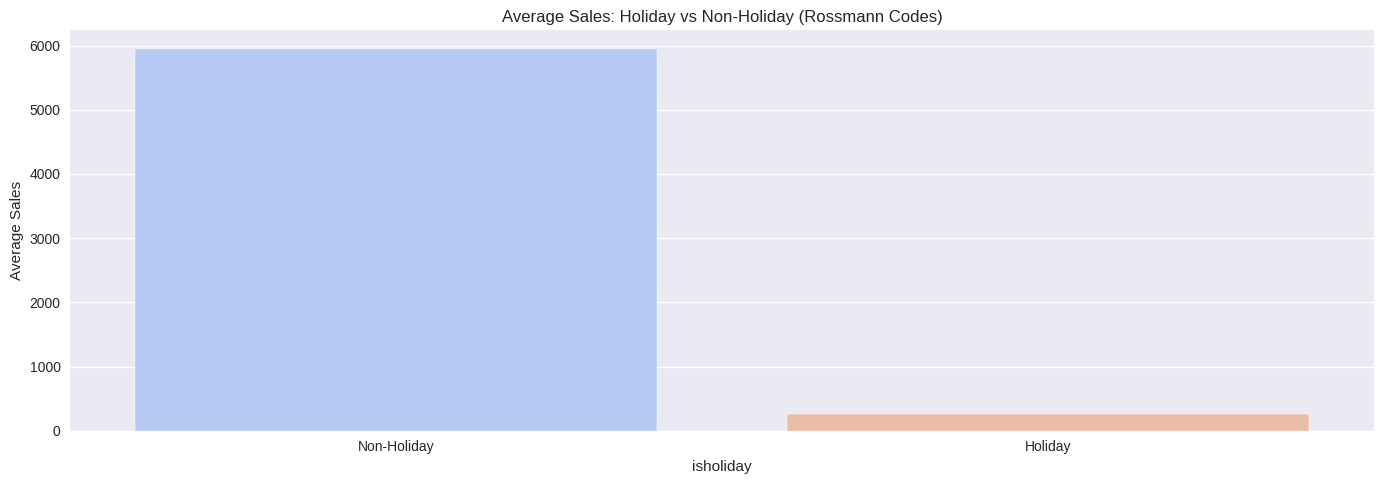

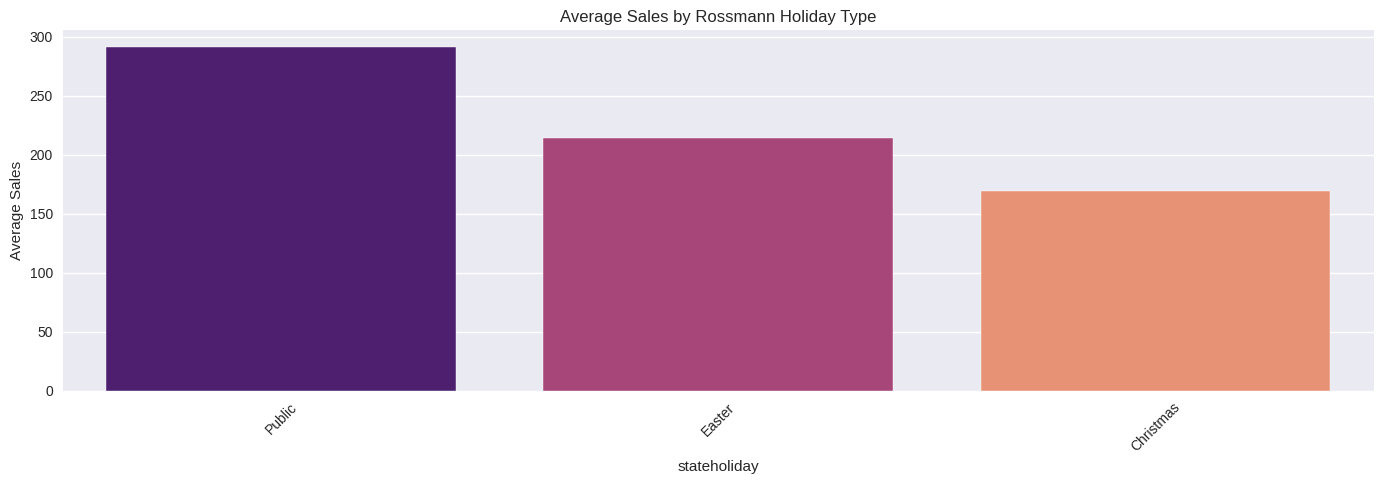

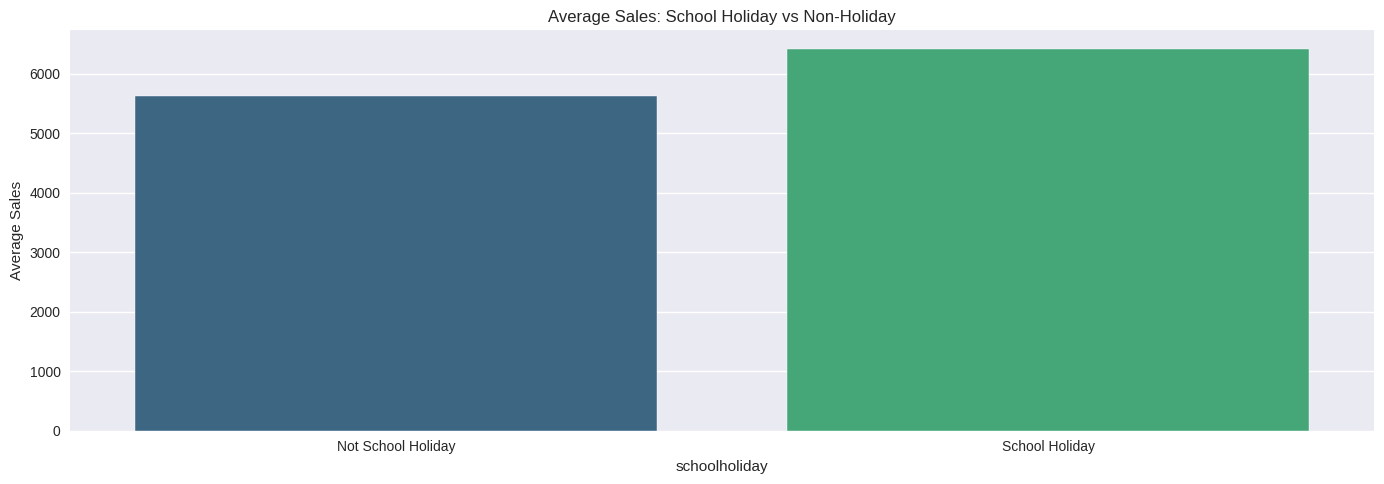

   isholiday   count    mean
0      False  951594 5940.39
1       True   31050  258.16

    schoolholiday   count    mean
0              0  813700 5627.01
1              1  168944 6405.44

   stateholiday  count   mean
0       Public  20260 290.74
1       Easter   6690 214.31
2    Christmas   4100 168.73


In [14]:
# -- Grouping for analysis --
holiday_summary = df_features.groupby("isholiday")["sales"].agg(["count", "mean"]).reset_index()
school_summary = df_features.groupby("schoolholiday")["sales"].agg(["count", "mean"]).reset_index()
holiday_type_summary = df_features[df_features["isholiday"]].groupby("stateholiday")["sales"].agg(["count", "mean"]).sort_values(by="mean", ascending=False).reset_index()

# -- Visualization: Holiday vs Non-Holiday --
plt.figure(figsize=(14,5))
sbn.barplot(x="isholiday", y="mean", data = holiday_summary, palette ="coolwarm")
plt.title("Average Sales: Holiday vs Non-Holiday (Rossmann Codes)")
plt.ylabel("Average Sales")
plt.xticks([0, 1], ["Non-Holiday", "Holiday"])
plt.tight_layout()
plt.show()

# -- Visualization: Holiday Type Impact --
plt.figure(figsize=(14,5))
sbn.barplot(x="stateholiday", y="mean", data = holiday_type_summary, palette="magma")
plt.title("Average Sales by Rossmann Holiday Type")
plt.xticks(rotation=45)
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

# -- Visualization: SchoolHoliday Impact --
plt.figure(figsize=(14,5))
sbn.barplot(x="schoolholiday", y="mean", data = school_summary, palette="viridis")
plt.title("Average Sales: School Holiday vs Non-Holiday")
plt.xticks([0, 1], ["Not School Holiday", "School Holiday"])
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

print(holiday_summary)
print('\n',school_summary)
print('\n',holiday_type_summary)
